Version history:
V0

- **Deadline**: Feb 4, at 23:59PM.
- **Submission**: You need to submit your solutions through Crowdmark, including all your derivations, plots, and your code. You can produce the files however you like (e.g. LATEX, Microsoft Word, etc), as long as it is readable. Points will be deducted if we have a hard time reading your solutions or understanding the structure of your code.
- **Collaboration policy**: After attempting the problems on an individual basis, you may discuss and work together on the assignment with up to two classmates. However, **you must write your own code and write up your own solutions individually and explicitly name any collaborators** at the top of the homework.

# Q1 - Decision Theory

One successful use of probabilistic models is for building spam filters, which take in an email and take different actions depending on the likelihood that it’s spam.

Imagine you are running an email service. You have a well-calibrated spam classifier that tells you the probability that a particular email is spam: $p(spam|email)$. You have five options for what to do with each email: You can list it as important email, show it to the user, put it in the other folder, put it in the spam folder, or delete it entirely.

Depending on whether or not the email really is spam, the user will suffer a different amount  of wasted time for the different actions we can take, $L$(action, spam):

Action   | Spam        | Not spam
-------- | ----------- | -----------
Important| 30         | 0
Show     | 10          | 2
Other | 1             | 5
Spam   | 3           | 50
Delete   | 0           | 100

## Q1.1
[3pts] Plot the expected wasted user time for each of the five possible actions, as a function of the probability of spam: $p(spam|email)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

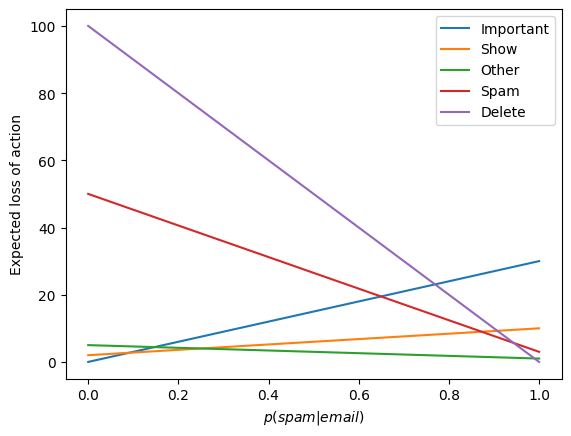

In [ ]:
losses = [[30, 0],[10, 2], [1, 5], [3, 50],[0, 100]]
actions_names = ['Important','Show', 'Other', 'Spam', 'Delete']
num_actions = len(losses)
def expected_loss_of_action(prob_spam, action):
    #TODO: Return expected loss over a Bernoulli random variable
    # with mean prob_spam.
    # Losses are given by the table above.
    expected_loss = losses[action][0] * prob_spam + losses[action][1] * (1 - prob_spam)

    return expected_loss

prob_range = np.linspace(0., 1., num=600)

# Make plot
for action in range(num_actions):
    plt.plot(prob_range, expected_loss_of_action(prob_range, action), label=actions_names[action])

plt.xlabel('$p(spam|email)$')
plt.ylabel('Expected loss of action')
plt.legend()


## Q1.2
[2pts] Write a function that computes the optimal action given the probability of spam.

In [ ]:
def optimal_action(prob_spam):
    #TODO: return best action given the probability of spam.
    #Hint: np.argmin might be helpful.
    exp_lossess = []
    for action in range(num_actions):
      exp_lossess.append(expected_loss_of_action(prob_spam, action))

    return np.argmin(exp_lossess)

## Q1.3
[4pts] Plot the expected loss of the optimal action as a function of the probability of spam.


Color the line according to the optimal action for that probability of spam.


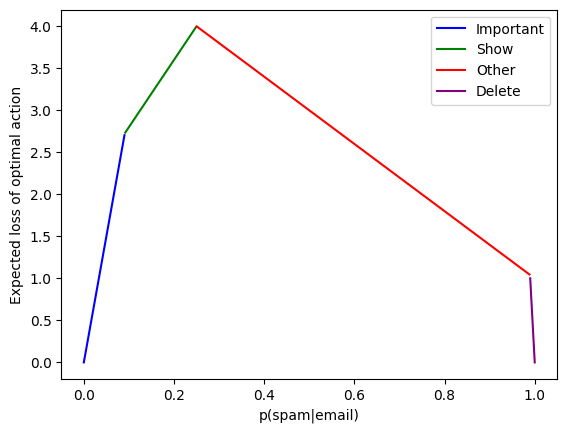

In [ ]:
prob_range = np.linspace(0., 1., num=600)
optimal_losses = []
optimal_actions = []
for p in prob_range:
    # TODO: Compute the optimal action and its expected loss for
    # probability of spam given by p.
    opt_act = optimal_action(p)
    opt_loss = expected_loss_of_action(p, opt_act)
    optimal_actions.append(opt_act)
    optimal_losses.append(opt_loss)


label_color_map = {0: 'blue', 1: 'green', 2: 'red', 4: 'purple'}

for label in set(optimal_actions):
    indices = [i for i, l in enumerate(optimal_actions) if l == label]
    plt.plot(np.array(prob_range)[indices], np.array(optimal_losses)[indices], label= actions_names[label], color=label_color_map[label])


plt.xlabel('p(spam|email)')
plt.ylabel('Expected loss of optimal action')
plt.legend()

## Q1.4
[4pts] For exactly which range of the probabilities of an email being spam should we set it as important?

And based on user feedback, they want less email to be marked as important. How to change $L$(action=important, spam=True) so that only if $p(spam|email)$ < 0.01, email would be marked as important?

Find the exact answer by hand using algebra.

[Type up your derivation here]

(1): Let the range of the probabilities of an email being spam should we set it as important be $P$.

The expected loss:

**Important:** $E(L_{important})$ = 30 * $p$ + 0 * (1 - $p$)

**Show:** $E(L_{show})$ = 10 * $p$ + 2(1 - $p$)

for it to be set as important,

$E(L_{important})$ <= $E(L_{show})$

30 * $p$ + 0 * (1 - $p$) <= 10 * $p$ + 2(1 - $p$)

$p$ <= 1/11

the range of probabilities of an email being spam should we set it as important would be smaller than 1/11, which is about 0.091.


---



(2): Based on user feedbacks, our new threshold to determine would be $p(spam|email)$ < 0.01

**Important:** $E(L_{important}^{*})$ = a * 0.01 + 0 * (1 - 0.01)

**Show:** $E(L_{show})$ = 10 * 0.01 + 2(1 - 0.01) = 0.1 + 1.98 = 2.08

In order for us to marked the email as important:

$E(L_{important}^{*})$ < $E(L_{show})$

0.01*a = 2.08

a = 208

Therefore, the loss function $L$(action=important, spam=True) = 208

# Q2 - Naïve Bayes, A Generative Model

![](https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true)


In this question, we'll fit a Bernoulli Naïve Bayes model to the fashion MNIST dataset, and use this model for making predictions and generating new images from the same distribution. Fasion MNIST is a dataset of 28x28 images of items of clothing.

We represent each image by a vector $x^{(i)} \in \{0,1\}^{D}$, where 0 and 1 represent white and black pixels respectively, and $D=784$. Each class label $c^{(i)}$ is a different item of clothing, which in the code is represented by a K=10-dimensional one-hot vector.

The Bernoulli Naïve Bayes model parameterized by $\theta$ and $\pi$ defines the following joint probability of $x$ and $c$,
$$p(x,c|\theta,\pi) = p(c|\pi)p(x|c,\theta) = p(c|\pi)\prod_{j=1}^{D}p(x_j|c,\theta),$$
where $x_j | c,\theta \sim \operatorname{Bernoulli}(\theta_{jc})$, i.e. $p(x_j | c,\theta) = \theta_{jc}^{x_j}(1-\theta_{jc})^{1-x_j}$, and $c|\pi$ follows a simple categorical distribution, i.e. $p(c|\pi) = \pi_c$.

We begin by learning the parameters $\theta$ and $\pi$.

First The following code will download and prepare the training and test sets.

In [ ]:
import numpy as np
import os
import gzip
import struct
import array
import matplotlib.pyplot as plt
import matplotlib.image
from urllib.request import urlretrieve

def download(url, filename):
    if not os.path.exists('data'):
        os.makedirs('data')
    out_file = os.path.join('data', filename)
    if not os.path.isfile(out_file):
        urlretrieve(url, out_file)


def fashion_mnist():
    base_url = 'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/'

    def parse_labels(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data = struct.unpack(">II", fh.read(8))
            return np.array(array.array("B", fh.read()), dtype=np.uint8)

    def parse_images(filename):
        with gzip.open(filename, 'rb') as fh:
            magic, num_data, rows, cols = struct.unpack(">IIII", fh.read(16))
            return np.array(array.array("B", fh.read()), dtype=np.uint8).reshape(num_data, rows, cols)

    for filename in ['train-images-idx3-ubyte.gz',
                     'train-labels-idx1-ubyte.gz',
                     't10k-images-idx3-ubyte.gz',
                     't10k-labels-idx1-ubyte.gz']:
        download(base_url + filename, filename)

    train_images = parse_images('data/train-images-idx3-ubyte.gz')
    train_labels = parse_labels('data/train-labels-idx1-ubyte.gz')
    test_images = parse_images('data/t10k-images-idx3-ubyte.gz')
    test_labels = parse_labels('data/t10k-labels-idx1-ubyte.gz')

    # Remove the data point that cause log(0)
    remove = (14926, 20348, 36487, 45128, 50945, 51163, 55023)
    train_images = np.delete(train_images,remove, axis=0)
    train_labels = np.delete(train_labels, remove, axis=0)
    return train_images, train_labels, test_images[:1000], test_labels[:1000]


def load_fashion_mnist():
    partial_flatten = lambda x: np.reshape(x, (x.shape[0], np.prod(x.shape[1:])))
    one_hot = lambda x, k: np.array(x[:, None] == np.arange(k)[None, :], dtype=int)
    train_images, train_labels, test_images, test_labels = fashion_mnist()
    train_images = (partial_flatten(train_images) / 255.0).astype(float)
    test_images = (partial_flatten(test_images) / 255.0).astype(float)
    train_images_binarized = (train_images > 0.5).astype(float)
    test_images_binarized = (test_images > 0.5).astype(float)
    train_labels = one_hot(train_labels, 10)
    test_labels = one_hot(test_labels, 10)
    N_data = train_images.shape[0]

    return N_data, train_images, train_images_binarized, train_labels, test_images, test_images_binarized, test_labels

In [ ]:
N_data, train_images, train_images_binarized, train_labels, test_images, test_images_binarized, test_labels = load_fashion_mnist()

print(N_data)


59993


## Q2.1
[4pts] Derive the expression for the Maximum Likelihood Estimator (MLE) of $\theta$ and $\pi$.

[Type up your derivation here]

Your answer:

The likelihood function

$$L(\theta,\pi) = \prod_{n=1}^{N}p(x_i,c_i|\theta,\pi) $$
$$ = \prod_{n=1}^{N} p(c_i|\pi)\prod_{j=1}^{D}p(x_{ij}|c_i,\theta)
$$
$$= \prod_{n=1}^{N} \pi_{c}^{(i)}\prod_{j=1}^{D} \theta_{jc^{(i)}}^{x_{j}^{(i)}}(1-\theta_{jc^{(i)}})^{1-x_{j}^{(i)}}$$

where N is the number of samples, D = 784

$$l(\theta,\pi) = log(\prod_{n=1}^{N} \pi_{c}^{(i)}\prod_{j=1}^{D} \theta_{jc^{(i)}}^{x_{j}^{(i)}}(1-\theta_{jc^{(i)}})^{1-x_{j}^{(i)}})$$

$$= \sum_{n=1}^{N} log(\pi_{c}^{(i)}) + \sum_{n=1}^{N}\sum_{j=1}^{D} x_{j}^{(i)} log(\theta_{jc^{(i)}}) + ({1-x_{j}^{(i)}})log(1-\theta_{jc^{(i)}})$$

For the MLE of $\theta$, we take the derivative of $l(\theta,\pi)$ w.r.t $\theta$:

$$\frac{d}{d\theta_{jc}}l(\theta,\pi) = \sum_{n=1}^{N}\sum_{j=1}^{D} \frac{x_{j}^{(i)}}{\theta_{jc^{(i)}}} - \frac{({1-x_{j}^{(i)}})}{1-\theta_{jc^{(i)}}} = 0$$

Given that in a bernoulli distribution,

where $f(x_j | c,\theta_{jc})$ = $\theta_{jc}$ if $x_j$ = 1 ($x_j$ is black pixel),

$f(x_j | c,\theta_{jc})$ = $1 - \theta_{jc}$ if $x_j$ = 0 ($x_j$ is white pixel).

$$\frac{d}{d\theta_{jc}}l(\theta,\pi) = \sum_{n=1}^{N} \frac{\mathbb{1}(x_{j}^{(i)} = 1 \& c^{(i)} = c)}{\theta_{jc}} - \frac{\mathbb{1}(x_{j}^{(i)} = 0 \& c^{(i)} = c)}{1-\theta_{jc}} = 0$$

$$({1-\theta_{jc}}) \sum_{n=1}^{N} \mathbb{1}(x_{j}^{(i)} = 1 \&  c^{(i)} = c) = \theta_{jc}\sum_{n=1}^{N} \mathbb{1}(x_{j}^{(i)} = 0 \& c^{(i)} = c)$$

$$ \sum_{n=1}^{N} \mathbb{1}(x_{j}^{(i)} = 1 \& c^{(i)} = c) = \theta_{jc}\sum_{n=1}^{N} \mathbb{1}(c^{(i)} = c)$$

$$ \hat{\theta_{jc}} =\frac{\sum_{n=1}^{N} \mathbb{1}(x_{j}^{(i)} = 1 \& c^{(i)} = c) }{\sum_{n=1}^{N} \mathbb{1}(c^{(i)} = c)}$$

Therefore, the MLE of $\theta$ is the proportion of number of black pixels appears in class $c$ for all observations over the total number of observations in class $c$ in the data.

---

For the MLE of $\pi$, we take the derivative of $l(\theta,\pi)$ w.r.t $\pi$:

$$\frac{d}{d\pi_{c}}l(\theta,\pi) = \frac{d}{d\pi_{c}}\sum_{n=1}^{N}log(\pi_{c^{(i)}})$$

Given that $c|\pi$ follows a simple categorical distribution, i.e. $p(c|\pi) = \pi_c$:

$$\sum_{c \in C} \pi_c = 1$$

We can apply the lagrange method:

$$f(x) =\sum_{n=1}^{N}\mathbb{1}(c^{(i)} = c)log(\pi_c) $$

$$g(x) = \sum_{c \in C} \pi_c - 1$$


$$\frac{d}{d\pi_{c}}\sum_{n=1}^{N}ln(\pi_{c^{(i)}}) = \lambda (\frac{d}{d\pi_{c}}\sum_{c \in C} \pi_c - 1 )$$


$$\sum_{n=1}^{N}\frac{I(c^{(i)} = c)}{\pi_c} = \lambda $$

$$\sum_{c \in C}\sum_{n=1}^{N}I(c^{(i)} = c) = \sum_{c \in C}\lambda \pi_c$$

$$\lambda = \frac{N}{1} = N$$


therefore, $$\hat{\pi_c} = \frac{\sum_{n=1}^{N} I(c^{(i)} = c)}{N}$$

The MLE of $\pi$ is the proportion of number of samples in class $c$ in the data.


## Q2.2
[5pts] Using the MLE for this data, many entries of $\theta$ will be estimated to be 0, which seems extreme. So we look for another estimation method.

Assume the prior distribution of $\theta$ is such that the entries are i.i.d. and drawn from $\operatorname{Beta}(\alpha,\alpha)$. Derive the Maximum A Posteriori (MAP) estimator for $\theta$ (it has a simple final form). You can return the MLE for $\pi$ in your implementation. From now on, we will work with this estimator.

[Type up your derivation here]

Your answer:

Prior: $\theta \sim \operatorname{Beta}(\alpha, \alpha)$

The pdf of theta:

$$p(\theta) = \frac{\Gamma(2\alpha)}{2\Gamma(\alpha)}\theta^{{\alpha} - 1}(1-\theta)^{{\alpha} - 1}$$

$$p(\theta)L(\theta,\pi) = p(\theta)\prod_{n=1}^{N} p(c_i|\pi)\prod_{j=1}^{D}p(x_{ij}|c_i,\theta)
$$
$$= p(\theta)\prod_{n=1}^{N} \pi_{c}^{(i)}\prod_{j=1}^{D} \theta_{jc^{(i)}}^{x_{j}^{(i)}}(1-\theta_{jc^{(i)}})^{1-x_{j}^{(i)}}$$

$$ln(p(\theta)L(\theta,\pi)) = ln(\frac{\Gamma(2\alpha)}{2\Gamma(\alpha)}) + ({\alpha} - 1)ln(\theta) + ({\alpha} - 1)ln(1- \theta) + \sum_{n=1}^{N} ln(\pi_{c}^{(i)}) + \sum_{n=1}^{N}\sum_{j=1}^{D} x_{j}^{(i)} ln(\theta_{jc^{(i)}}) + ({1-x_{j}^{(i)}})ln(1-\theta_{jc^{(i)}})$$

For the MAP of $\theta$, we take its derivative w.r.t $\theta_{jc}$:

$$\frac{\alpha - 1}{\theta_{jc}} - \frac{\alpha - 1}{1-\theta_{jc}} + \sum_{n=1}^{N}\sum_{j=1}^{D} \frac{x_{j}^{(i)}}{\theta_{jc^{(i)}}} - \frac{({1-x_{j}^{(i)}})}{1-\theta_{jc^{(i)}}} = 0$$

$$ \frac{\alpha - 1}{\theta_{jc}} - \frac{\alpha - 1}{1-\theta_{jc}}+\sum_{n=1}^{N} \frac{I(x_{j}^{(i)} = 1, c^{(i)} = c)}{\theta_{jc}} - \frac{I(x_{j}^{(i)} = 0, c^{(i)} = c)}{1-\theta_{jc}} = 0$$


$$ \frac{\alpha - 1}{\theta_{jc}} +\sum_{n=1}^{N} \frac{I(x_{j}^{(i)} = 1, c^{(i)} = c)}{\theta_{jc}} = \frac{\alpha - 1}{1-\theta_{jc}} + \sum_{n=1}^{N}\frac{I(x_{j}^{(i)} = 0, c^{(i)} = c)}{1-\theta_{jc}}$$

$$ (1-\theta_{jc})[\alpha - 1+\sum_{n=1}^{N}I(x_{j}^{(i)} = 1, c^{(i)} = c)] = \theta_{jc}[\alpha - 1 + \sum_{n=1}^{N}I(x_{j}^{(i)} = 0, c^{(i)} = c)]$$


$$ \alpha - 1+\sum_{n=1}^{N}I(x_{j}^{(i)} = 1, c^{(i)} = c) = \theta_{jc}[2(\alpha - 1) + \sum_{n=1}^{N}I(c^{(i)} = c)]$$

$$\hat{\theta_{MAP}} = \frac{\alpha - 1+\sum_{n=1}^{N}I(x_{j}^{(i)} = 1, c^{(i)} = c)}{2(\alpha - 1) + \sum_{n=1}^{N}I(c^{(i)} = c)}$$

In [ ]:
def train_map_estimator(train_images, train_labels, alpha):
    """ Inputs:
        train_images (N_samples x N_features)
        train_labels (N_samples x N_classes)
        alpha (float)
        Returns the MAP estimator theta_est (N_features x N_classes) and the MLE
        estimator pi_est (N_classes)"""

    # YOU NEED TO WRITE THIS PART
    class_ocurrence_vec  = np.sum(train_labels, axis = 0)

    # Construct theta_est (MAP)
    theta_est = list()
    for c_val in range(train_labels.shape[1]):
      class_ind = np.where(train_labels[:, c_val] == 1)
      n_black_occurence_class_c = np.sum(train_images[class_ind], axis = 0)
      theta_MAP_c = (alpha - 1 + n_black_occurence_class_c) / (2*(alpha - 1) + class_ocurrence_vec[c_val])
      theta_est.append(theta_MAP_c)

    # Adjust the dimension to N_features x N_classes
    theta_est = np.transpose(np.array(theta_est))

    # Construct pi_est (MLE)
    n_samples, _ = train_images.shape
    pi_est = class_ocurrence_vec / n_samples

    return theta_est, pi_est


## Q2.3
a) [4pts] Derive an expression for the class log-likelihood $\log p(c|x,\theta,\pi)$ for a single image. Then, complete the implementation of the following functions. Recall that our prediction rule is to choose the class that maximizes the above log-likelihood, and accuracy is defined as the fraction of samples that are correctly predicted.

Report the average log-likelihood $\frac{1}{N}\sum_{i=1}^{N}\log p(c^{(i)}|x^{(i)},\hat{\theta},\hat{\pi})$ (where $N$ is the number of samples) on the training test, as well the training and test errors. Use a value of $\alpha = 2$.

[Type up your derivation here]

Your answer:

Based on the conditional probability equation:

$$p(c,x|\theta,\pi) = p(c|x,\theta,\pi)p(x|\theta,\pi)$$

$$p(c|x,\theta,\pi) = \frac{p(c,x|\theta,\pi) }{p(x|\theta,\pi)}= \frac{p(c,x|\theta,\pi) }{\sum_{c'\in C}p(x, c'|\theta,\pi)}$$


$$log(p(c|x,\theta,\pi)) = log(\pi_{c}) + \sum_{j=1}^{D} x_{j} log(\theta_{jc}) + ({1-x_{j}})log(1-\theta_{jc}) - log(\sum_{c'\in C}\pi_{c'}\prod_{j=1}^{D} \theta_{jc'}^{x_{j}}(1-\theta_{jc'})^{1-x_{j}})$$



In [ ]:
def log_likelihood(images, theta, pi):
    """ Inputs: images (N_samples x N_features), theta, pi
        Returns the matrix 'log_like' of loglikehoods over the input images where
        log_like[i,c] = log p (c |x^(i), theta, pi) using the estimators theta and pi.
        log_like is a matrix of (N_samples x N_classes)
    Note that log likelihood is not only for c^(i), it is for all possible c's."""

    # YOU NEED TO WRITE THIS PART
    log_like = np.zeros((images.shape[0], len(pi)))

    # Construct the numerator part
    log_like_numer = np.log(pi) + images @ np.log(theta) + (1 - images) @ np.log(1 - theta)

    # Construct the normalizing constant denominator part
    for i in range(images.shape[0]):
      denom = 0
      for c in range(len(pi)):
          denom_c = pi[c] * np.prod(pow(theta[:, c], images[i, :]) * \
                                    pow((1 - theta[:, c]), (1 - images[i, :])))
          denom += denom_c

      log_like[i,:] = log_like_numer[i, :] - np.log(denom)

    return log_like


def accuracy(log_like, labels):
    """ Inputs: matrix of log likelihoods and 1-of-K labels (N_samples x N_classes)
    Returns the accuracy based on predictions from log likelihood values"""

    # YOU NEED TO WRITE THIS PART
    pred_label = np.argmax(log_like, axis = 1)
    true_label = np.argmax(labels, axis = 1)

    acc = np.mean(pred_label == true_label)

    return acc


N_data, train_images, train_images_binarized, train_labels, test_images, test_images_binarized, test_labels = load_fashion_mnist()

theta_est, pi_est = train_map_estimator(train_images_binarized, train_labels, alpha=2.)

loglike_train = log_likelihood(train_images_binarized, theta_est, pi_est)
avg_loglike = np.sum(loglike_train * train_labels) / N_data
train_accuracy = accuracy(loglike_train, train_labels)
loglike_test = log_likelihood(test_images_binarized, theta_est, pi_est)
test_accuracy = accuracy(loglike_test, test_labels)

print(f"Average log-likelihood for MAP with alpha = 2 is {avg_loglike:.3f}")
print(f"Training accuracy for MAP with alpha = 2 is {train_accuracy:.3f}")
print(f"Test accuracy for MAP with alpha = 2 is {test_accuracy:.3f}")

Average log-likelihood for MAP with alpha = 2 is -34.231
Training accuracy for MAP with alpha = 2 is 0.651
Test accuracy for MAP with alpha = 2 is 0.638


b) [2pts] Now compute the MAP estimators using $\alpha = 1$. Then rerun the code for computing the log-likelihoods and accuracy.

What do you observe? - comment on whether it was important or not to use the MAP (with $\alpha > 1$). Based on your previous derivation, what does $\alpha = 1$ correspond to?

(Note: You do not need to report the average log-likelihoods or accuracy in this part.)

In [ ]:
theta_alpha1_est, pi_est = train_map_estimator(train_images_binarized, train_labels, alpha=1.)

loglike_train = log_likelihood(train_images_binarized, theta_alpha1_est, pi_est)
avg_loglike = np.sum(loglike_train * train_labels) / N_data
train_accuracy = accuracy(loglike_train, train_labels)
loglike_test = log_likelihood(test_images_binarized, theta_alpha1_est, pi_est)
test_accuracy = accuracy(loglike_test, test_labels)

print(f"Average log-likelihood for MAP with alpha = 1 is {avg_loglike:.3f}")
print(f"Training accuracy for MAP with alpha = 1 is {train_accuracy:.3f}")
print(f"Test accuracy for MAP with alpha = 1 is {test_accuracy:.3f}")

<ipython-input-11-6a3d7e4cca86>:10: RuntimeWarning: divide by zero encountered in log
  log_like_nom = np.log(pi) + images @ np.log(theta) + (1 - images) @ np.log(1 - theta)
<ipython-input-11-6a3d7e4cca86>:10: RuntimeWarning: invalid value encountered in matmul
  log_like_nom = np.log(pi) + images @ np.log(theta) + (1 - images) @ np.log(1 - theta)
<ipython-input-11-6a3d7e4cca86>:24: RuntimeWarning: divide by zero encountered in log
  log_like[i,:] = log_like_nom[i, :] - np.log(denom)


Average log-likelihood for MAP with alpha = 1 is nan
Training accuracy for MAP with alpha = 1 is 0.100
Test accuracy for MAP with alpha = 1 is 0.107


[Type up your answer here.]

When we use $\alpha = 1$, warnings of dividing by zero encountered in log would occur. This is because when we use $\alpha = 1$, our MAP estimator derived above is equivalent like the MLE estimator of $\theta$, where many entries of $\theta$ will be estimated to be 0 given there are more white pixels compare to black ones. Therefore, some of the denominators/normalizing constants would be natural log(0), which are undefined. In this case, it is necessary to use the MAP estimator of $\theta$.

## Q2.4
[2pts] Given this model's assumptions, is it always true that any two pixels $x_i$ and $x_j$ with $i \neq j$ are independent:
- when conditioned on $c$?
- after marginalizing over $c$?
- when unconditioned on $c$?

Provide brief justification for your answers.

[Type up your answer here]

Your answer:


## Q2.5
[3pts]
- How many parameters need to be estimated in the Bernoulli Naive Bayes model?
- How many parameters need to be estimated, if we remove the Naive Bayes assumption?

Briefly justify your answers.

[Type up your answer here]

Your answer:

(i): In a **Bernoulli Naive Bayes model**, we assume that $p(x_j| c,x_1, x_2, ..., x_{j-1}) = p(x_j| c)$ for all $i \neq j$. This means that given the class c, for all $i \neq j$, $x_i$ is independent from $x_j$.

In this case, for each node of $x_j$, we need to estimate 2 parameters. Given we have $D$ pixels for an image, the number of parameters to be estimated in this setting would be $2D + 1$, where 1 stands for the parameter of the class $c$. Given $D = 784$, the result would be 1569.


---


(i): If we remove the assumption, the probability for $x_j$ would be $p(x_j| c,x_1, x_2, ..., x_{j-1})$. Therefore, for the joint probability function:

$$p(c, x) = p(c)p(x_1|c)\prod_{j=2}^{D}p(x_j|c,x_1,..., x_{j-1})$$

In this case, for each node of $x_j$, we need to estimate $2^j$ parameters. Given we have $D$ pixels for an image, the number of parameters to be estimated in this setting would be $1+ \sum_{j=1}^{D} 2^j = 1 + 2^D - 2 = 2^D - 1$. Given $D = 784$, the result would be $2^{784}-1$.


## Q2.6
[4pts] Since we have a generative model for our data, we can do more than just prediction. Randomly sample and plot 10 images from the learned distribution using the MAP estimates. (Hint: You first need to sample the class $c$, and then sample pixels conditioned on $c$.)

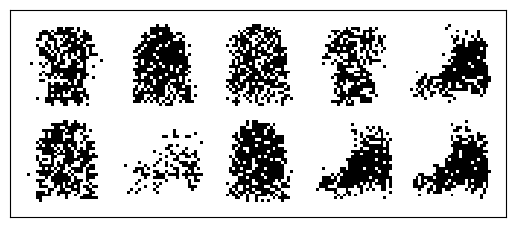

In [ ]:
def image_sampler(theta, pi, num_images):
    """ Inputs: parameters theta and pi, and number of images to sample
    Returns the sampled images (N_images x N_features)"""

    # YOU NEED TO WRITE THIS PART
    images = list()

    for i in range(num_images):
      c = np.random.choice(len(pi), size = 1, p = pi)
      img = np.random.binomial(1, theta[:, c]).reshape(theta.shape[0])
      images.append(img)

    return np.array(images)


def plot_images(images, ims_per_row=5, padding=5, image_dimensions=(28, 28),
                cmap=matplotlib.cm.binary, vmin=0., vmax=1.):
    """Images should be a (N_images x pixels) matrix."""
    fig = plt.figure(1)
    fig.clf()
    ax = fig.add_subplot(111)

    N_images = images.shape[0]
    N_rows = np.int32(np.ceil(float(N_images) / ims_per_row))
    pad_value = vmin
    concat_images = np.full(((image_dimensions[0] + padding) * N_rows + padding,
                             (image_dimensions[1] + padding) * ims_per_row + padding), pad_value)
    for i in range(N_images):
        cur_image = np.reshape(images[i, :], image_dimensions)
        row_ix = i // ims_per_row
        col_ix = i % ims_per_row
        row_start = padding + (padding + image_dimensions[0]) * row_ix
        col_start = padding + (padding + image_dimensions[1]) * col_ix
        concat_images[row_start: row_start + image_dimensions[0],
                      col_start: col_start + image_dimensions[1]] = cur_image
        cax = ax.matshow(concat_images, cmap=cmap, vmin=vmin, vmax=vmax)
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))

    plt.plot()


np.random.seed(414)
sampled_images = image_sampler(theta_est, pi_est, 10)
plot_images(sampled_images)

## Q2.7
[5pts] One of the advantages of generative models is that they can handle missing data, or be used to answer different sorts of questions about the model. Assume we have only observed some pixels of the image. Let $x_E = \left\{x_p : \text{pixel p is observed}\right\}$. Derive an expression for $p(x_j|x_E,\theta,\pi)$, the conditional probability of an unobserved pixel $j$ given the observed pixels and distribution parameters. (Hint: You have to marginalize over $c$.)

[Type up your derivation here]

Your answer:

$$p(x_j|x_E,\theta,\pi)= \sum_{c \in C} p(x_j, c|x_E,\theta,\pi)$$

Given c, any two pixels are independent with each other:
$$p(x_j|x_E,\theta,\pi)= \sum_{c \in C} p(x_j|c, \theta) p(c|x_E,\theta,\pi)$$

$$= \sum_{c \in C} \frac{p(x_j|c, \theta)p(x_E, c|\theta, \pi)}{p(x_E|\theta, \pi)}$$

$$= \frac{\sum_{c \in C}p(x_j|c, \theta)p(c|\pi)p(x_E|c,\theta)}{\sum_{c' \in C}p(c'|\pi)p(x_E|c',\theta)}$$

$$= \frac{\sum_{c \in C}p(x_j|c, \theta)p(c|\pi)p(x_E|c,\theta)}{\sum_{c'\in C}\pi_{c'}\prod_{j\in E} \theta_{jc'}^{x_{j}}(1-\theta_{jc'})^{1-x_{j}}}$$

$$= \frac{\sum_{c \in C}\pi_c  \theta_{jc}^{x_{j}}(1-\theta_{jc})^{1-x_{j}}\prod_{j\in E} \theta_{jc}^{x_{j}}(1-\theta_{jc})^{1-x_{j}}}{\sum_{c'\in C}\pi_{c'}\prod_{j\in E} \theta_{jc'}^{x_{j}}(1-\theta_{jc'})^{1-x_{j}}}$$




## Q2.8
a) [5pts] We assume that only 30% of the pixels are observed. For the first 30 images in the training set, plot the images when the unobserved pixels are left as white, as well as the same images when the unobserved pixels are filled with the marginal probability of the pixel being 1 given the observed pixels, i.e. the value of the unobserved pixel $j$ is $p(x_j = 1|x_E,\theta,\pi)$.



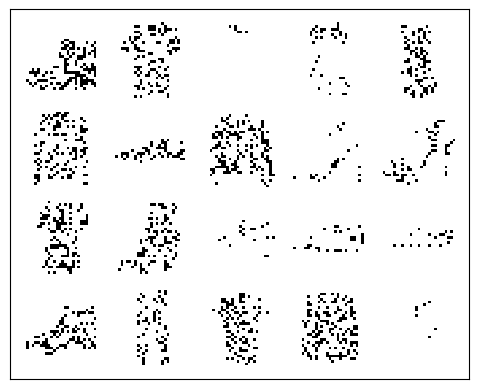

In [ ]:
def probabilistic_imputer(theta, pi, original_images, is_observed):
    """Inputs: parameters theta and pi, original_images (N_images x N_features),
        and is_observed which has the same shape as original_images, with a value
        1. in every observed entry and 0. in every unobserved entry.
    Returns the new images where unobserved pixels are replaced by their
    conditional probability"""

    # YOU NEED TO WRITE THIS PART
    new_images = np.copy(original_images)

    for i in range(original_images.shape[0]):
      obs_ind = np.where(is_observed[i, :] == 1)[0]
      unobs_ind = np.where(is_observed[i, :] == 0)[0]
      # Replaced unobserved pixels by their conditional probability for (x_j = 1)
      for ind in unobs_ind:
        numer = denom = 0
        for c in range(len(pi)):
          obs_prod = np.prod([theta[j, c] if original_images[i, j] == 1 \
                              else (1-theta[j,c]) for j in obs_ind])
          numer += pi[c] * theta[ind, c] * obs_prod
          denom += pi[c] * obs_prod

        new_images[i, ind] = numer / denom

    return new_images


num_features = train_images_binarized.shape[1]
is_observed = np.random.binomial(1, p=0.3, size=(20, num_features))
plot_images(train_images_binarized[:20] * is_observed)

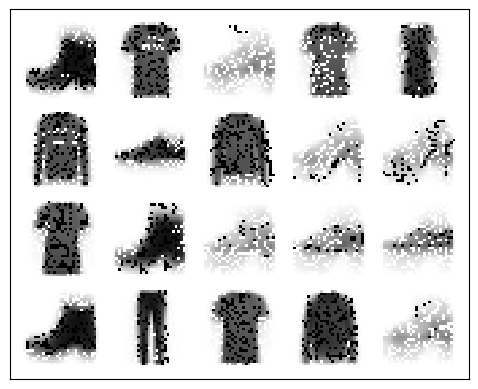

In [ ]:
imputed_images = probabilistic_imputer(theta_est, pi_est, train_images_binarized[:20], is_observed)
plot_images(imputed_images)

b) [2pt] Now suppose instead of choosing the 30% observed pixels at random, we constructed a grid with roughly evenly spaced observed pixels, as follows:

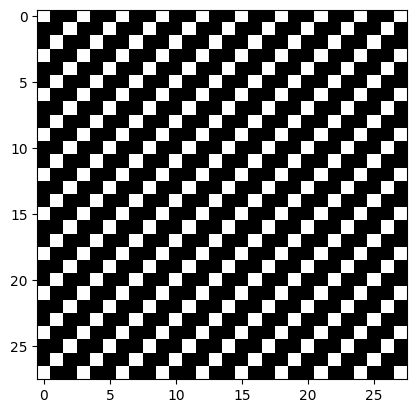

In [ ]:
h, w = 28, 28
p = 0.3

num_pixels = h * w
num_indices = int(num_pixels * p)

step_size = num_pixels // num_indices

indices = [(i // w, i % w) for i in range(0, num_pixels, step_size)]
flattened_indices = [row * w + col for row, col in indices]

one_hot_indices = np.zeros(num_pixels, dtype=int)
for index in flattened_indices:
    one_hot_indices[index] = 1

one_hot_matrix = one_hot_indices.reshape(h, w)

import matplotlib.pyplot as plt
plt.imshow(one_hot_matrix, cmap='gray')
plt.show()

Next we impute as before, except using this grid of observed indices.

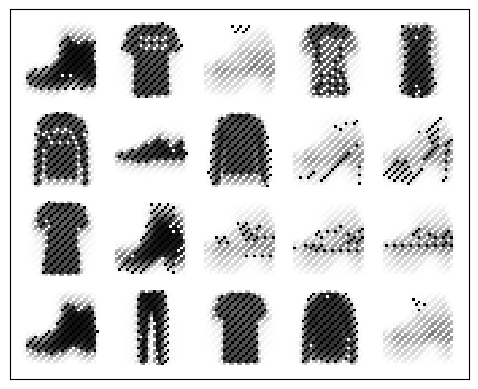

In [ ]:
repeated_one_hot_indices = np.tile(one_hot_indices, (20, 1))
imputed_images = probabilistic_imputer(theta_est, pi_est, train_images_binarized[:20], repeated_one_hot_indices)
plot_images(imputed_images)

Compare the resulting images you found when using the probabilistic_imputer in part 2.8 a) (random 30% observed) and 2.8 (evenly spaced 30% observed).

What do you find? Why might one of the two resulting samples of images be better than the other?
(Hint: consider what the spatial properties of naturally occuring images are.)\
You can use the following ground truth images to help inform your answer.

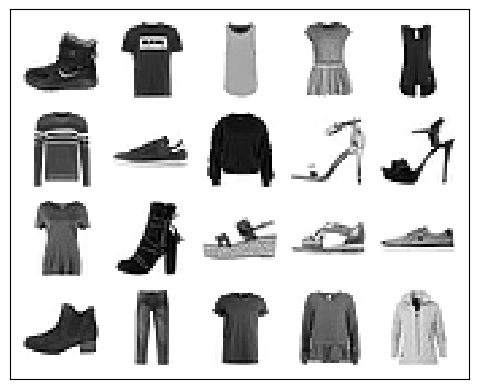

In [ ]:
plot_images(train_images[:20])

Your answer:

## Q2.9

We now consider the Gaussian Naïve Bayes model to model the pixel data. Thus we revert back to representing each data sample using a continuous range of values, i.e. $x^{(i)} \in \mathbb{R}^{D}$, and we no longer use the binarized version of the data samples. (Note that in reality $x^{(i)} \in \left[0,1\right]^{D}$, but for the purposes of this question we will ignore this.) Here the joint probability distribution of $x$ and $c$ is given by $$p(x,c|\mu,\Sigma,\pi) =  p(c|\pi)p(x|c,\mu,\Sigma) = p(c|\pi)p(x|c,\mu,\Sigma),$$ where $p(x | c,\mu,\Sigma) = \frac{1}{\sqrt{\left(2\pi\right)^{D}|\Sigma_{c}|}}\exp\left(-\frac{1}{2}\left(x-\mu_{c}\right)^{T}\Sigma_{c}^{-1}\left(x-\mu_{c}\right)\right)$. As before $c|\pi$ follows a simple categorical distribution, i.e. $p(c|\pi) = \pi_c$.

[1pts] Recall in general for the normal distribution, $\Sigma_{c} \in \mathbb{R}^{D,D}$. What special form does $\Sigma_{c}$ take, in context of the Naive Bayes assumption?

[Type your answer here.]

[7pts] Derive the maximum likelihood estimates of $\mu_{c}$, $\Sigma_{c},\pi_{c}$ for all $c \in \left\{1, \ldots, 10\right\}$, then fill in the code block below with the implementation.\
(Hint: it is normal if you use a single for loop over the computation of each $\Sigma_{c}$)\

Derivation:

Type up your answer here.

In [ ]:
def train_gnb_mle_estimator(train_images, train_labels, epsilon=1e-6):
    """ Inputs:
        train_images (N_samples x N_features)
        train_labels (N_samples x N_classes)
        Returns the MLE estimators mu_est, sigma_est, pi_est.
    """
    # YOU NEED TO WRITE THIS PART


## Q2.10
[6pts] Similar to before, derive an expression for the class log-likelihood $\log p(c|x,\mu,\Sigma,\pi)$ for a single image. Then, complete the implementation for computing the log_likelihoods.

As before report the average log-likelihood $\frac{1}{N}\sum_{i=1}^{N}\log p(c^{(i)}|x^{(i)},\hat{\theta},\hat{\pi})$ (where $N$ is the number of samples) on the training test, as well the training and test errors. Use the accuracy function you implemented earlier.

Note: Here because we did not find the MAP estimators for $\mu, \Sigma$ we use a technique called variance smoothing, which adds a small value $\epsilon$ to $\Sigma$ in the implementation, before computing the log-likelihoods. The subsequent part of this question comments on what one might expect if they used the MAP estimators.

[Type up your derivation here]

Your answer:

In [ ]:
def gnb_log_likelihood(images, mu, sigma, pi, epsilon):
    sigma = sigma + epsilon

    # YOU NEED TO WRITE THIS PART



N_data, train_images, _, train_labels, test_images, _, test_labels = load_fashion_mnist()
mu_est, sigma_est, pi_est = train_gnb_mle_estimator(train_images, train_labels)

epsilon = 1e-05
loglike_train = gnb_log_likelihood(train_images, mu_est, sigma_est, pi_est, epsilon)
avg_loglike = np.sum(loglike_train * train_labels) / N_data
train_accuracy = accuracy(loglike_train, train_labels)
loglike_test = gnb_log_likelihood(test_images, mu_est, sigma_est, pi_est, epsilon)
test_accuracy = accuracy(loglike_test, test_labels)

print(f"Average log-likelihood for MLE (with variance smoothing) is {avg_loglike:.3f}")
print(f"Training accuracy for MLE (with variance smoothing) is {train_accuracy:.3f}")
print(f"Test accuracy for MLE (with variance smoothing) is {test_accuracy:.3f}")

Using a small value of $\epsilon$ is a crude way of circumventing the problem of using the MLE directly.

The MAP for the Gaussian Naive Bayes can be obtained with the help of the conjugate prior for the multivariate normal distribution, which is the [normal-inverse-Wishart](https://en.wikipedia.org/wiki/Normal-inverse-Wishart_distribution). We will not derive the MAP for the Gaussian Naive Bayes here - but one can still appreciate the benefit of doing so by drawing a comparison to what was found for the Bernoulli Naive Bayes, when $\alpha=2$ was used as compared with $\alpha=1$.

# Q3 - Bayes Ball Algorithm

## Q3.1
[8pts]

Consider the following directed acyclic graph. Use the Bayes ball algorithm to compute all the nodes that are independent of $C$ given

i: $\{B, D\}$,

ii: $\{H\}$.

![picture](https://drive.google.com/uc?export=view&id=1bayO6U6K5S2hfFvUFxu4ceu11xS6UQug)



[Type up your answer below]

i: A, F

ii: None


## Q3.2
[6pts] For the graph shown above, show using the factorization of the joint probabilities whether $D$ is independent of $H$ given $E$. You may suppose that the domain of the variable $G$ is $\mathbf{G}$.

Hint:  $P(E|D) = \sum_{G \in \mathbf{G}} P(E|D,G) P(G) $.

[Type up your answer below]


$P(H|D,E)$

= $\frac{P(D,E,H)}{P(D,E)}$

= $\frac{P(D) P(E| D, G) P(H|E)}{P(D) P(E| D, G)}$

= $P(H|E)$

Therefore, D is independent of H given E.

## Q3.3

[6pts] Consider the following lattice structure with the diagonal nodes shaded. You may assume that it extends arbitrarily far upwards and also to the right.

Conditioned on the shaded nodes, what are the set of all nodes independent of $C_2$? Justify your answer.


![picture](https://drive.google.com/uc?export=view&id=16m-VS7u4fVYmlYc-kOhNt5tusFed7ns1)

[Type up your answer below]

None of the nodes is independent of $C_{2}$ given the shaded nodes.

## Q3.4

[7pts] Consider the following checkboard variant of the lattice from the previous question. Assume it extends indefinitely to the right and upwards (not shown in the diagram).


![picture](https://drive.google.com/uc?export=view&id=19vPIisi7zEP8yFS4S3lnOMDKGWSDZqQA)

Condition on the shaded nodes. What are the set of all nodes that are conditionally independent of the variable $B_3$? (You may also state the set conditionally dependent on $B_3$ if it is easier).

As a result, what can be concluded about the "shape" of the set of conditionally independent nodes for an arbitrary unshaded node?

[Type up your answer below]

(i) Conditionally dependent: $A_4$, $C_2$

(ii) Conditionally independent: $A_2$, $C_4$, $B_1$

 The "shape" of the set of conditionally independent nodes for an arbitrary unshaded node would include those that are not its "descendents" (e.g. for $B_3$, $A_2$ and $B_1$ are the "parents" of its "parents" $A_3$ and $B_2$). Also, it includes one "descentdent", $C_4$, that is the direct "child" of its direct children $B_4$ and $C_3$.